### MACHINE LEARNING 
### NAME: KSHITIJ CHILATE
### DATE: 29/12/25

### EXP 7: To implement the K-Means algorithm on a given dataset.

K-means
Algorithm Steps:

Step 1: Choose the number of clusters k

Step 2: Select k random points from the data as centroids

Step 3: Assign all the points to the closest cluster centroid

Step 4: Recompute the centroids of newly formed clusters

Step 5: Repeat steps 3 and 4 till all points are mapped.

/tmp/ipython-input-2844040193.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


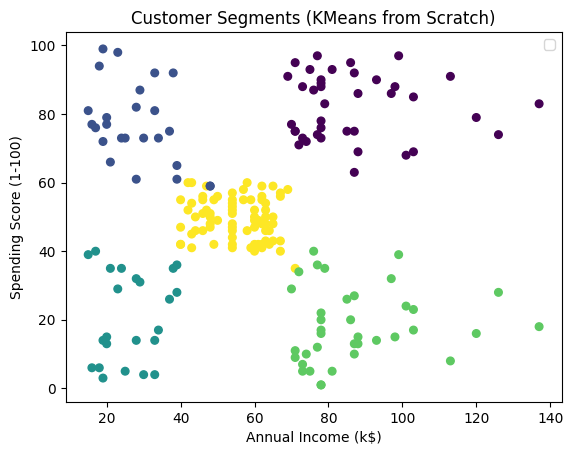

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("shop.xlsx")
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        if random_state:
            np.random.seed(random_state)

    def fit(self, X):
        n_samples, n_features = X.shape


        random_idx = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
            if np.all(np.abs(self.centroids - new_centroids) < self.tol):
                break
            self.centroids = new_centroids


        self.labels_ = self._assign_clusters(X)

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    def predict(self, X):
        return self._assign_clusters(X)



kmeans = KMeans(k=5, max_iters=200, random_state=42)
kmeans.fit(X)
plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis', s=30)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (KMeans from Scratch)")
plt.legend()
plt.show()
